In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'

In [3]:
annotation = 'annotation_own_score_genes_HLMartin_12'
path_mg = OUTPUT_DIR + '/' + 'HLMartin.csv'

In [4]:
anndataA11_all = sc.read(OUTPUT_DIR + '/' + 'A1-1/anndataNucA11_all.h5ad')
anndataA12_all = sc.read(OUTPUT_DIR + '/' + 'A1-2/anndataNucA12_all.h5ad')
anndataC2_all = sc.read(OUTPUT_DIR + '/' + 'C2/anndataNucC2_all.h5ad') 
anndataD21_all = sc.read(OUTPUT_DIR + '/' + 'D2-1/anndataNucD21_all.h5ad')

In [5]:
# Give Leiden clusters unique numbers over all samples
n_leiden_A11 = len(np.unique(anndataA11_all.obs['leiden']))
n_leiden_A12 = len(np.unique(anndataA12_all.obs['leiden']))
n_leiden_C2 = len(np.unique(anndataC2_all.obs['leiden']))
n_leiden_D21 = len(np.unique(anndataD21_all.obs['leiden']))
anndataA11_all.obs['leiden'] = anndataA11_all.obs['leiden'].astype(int)
anndataA12_all.obs['leiden'] = anndataA12_all.obs['leiden'].astype(int) + n_leiden_A11
anndataC2_all.obs['leiden'] = anndataC2_all.obs['leiden'].astype(int) + n_leiden_A11 + n_leiden_A12
anndataD21_all.obs['leiden'] = anndataD21_all.obs['leiden'].astype(int) + n_leiden_A11 + n_leiden_A12 + n_leiden_C2
# reset to string
anndataA11_all.obs['leiden'] = anndataA11_all.obs['leiden'].astype(str)
anndataA12_all.obs['leiden'] = anndataA12_all.obs['leiden'].astype(str)
anndataC2_all.obs['leiden'] = anndataC2_all.obs['leiden'].astype(str)
anndataD21_all.obs['leiden'] = anndataD21_all.obs['leiden'].astype(str)
# make categorical
anndataA11_all.obs['leiden'] = anndataA11_all.obs['leiden'].astype('category')
anndataA12_all.obs['leiden'] = anndataA12_all.obs['leiden'].astype('category')
anndataC2_all.obs['leiden'] = anndataC2_all.obs['leiden'].astype('category')
anndataD21_all.obs['leiden'] = anndataD21_all.obs['leiden'].astype('category')

In [6]:
# concatenate all anndata objects
anndata_samples_together = anndataA11_all.concatenate(anndataA12_all, anndataC2_all, anndataD21_all)

In [7]:
print(anndataA11_all.obs.shape)
print(anndataA12_all.obs.shape)
print(anndataC2_all.obs.shape)
print(anndataD21_all.obs.shape)
print(anndata_samples_together.obs.shape) # batch 0 = A1-1, batch 1 = A1-2, batch 2 = C2, batch 3 = D2-1

(11283, 96)
(8695, 96)
(27133, 96)
(12519, 96)
(59630, 97)


Meso
[]
Fibr
[(31, 0.79, 118), (67, 0.53, 89), (166, 0.78, 83), (241, 0.52, 25), (296, 0.74, 201), (423, 0.51, 138), (436, 0.73, 127)]
Hepa
[(2, 0.98, 164), (5, 1.0, 148), (7, 0.95, 141), (9, 1.0, 139), (11, 0.99, 133), (12, 0.98, 133), (14, 0.87, 132), (16, 0.98, 131), (17, 0.99, 130), (18, 0.94, 130), (20, 1.0, 127), (21, 0.98, 125), (24, 0.98, 123), (26, 0.98, 122), (28, 1.0, 120), (29, 1.0, 119), (32, 1.0, 118), (34, 0.96, 117), (35, 0.98, 115), (38, 1.0, 113), (39, 0.99, 110), (40, 1.0, 110), (41, 1.0, 108), (44, 1.0, 106), (46, 1.0, 106), (47, 0.94, 103), (48, 1.0, 102), (49, 0.71, 102), (50, 1.0, 101), (51, 1.0, 101), (52, 1.0, 100), (53, 1.0, 100), (54, 0.92, 100), (55, 1.0, 99), (57, 1.0, 95), (58, 1.0, 94), (60, 0.99, 92), (61, 0.99, 92), (62, 1.0, 91), (63, 1.0, 91), (65, 1.0, 89), (69, 0.99, 85), (70, 0.98, 82), (71, 1.0, 82), (72, 1.0, 81), (73, 0.99, 80), (74, 0.7, 80), (75, 0.98, 80), (76, 1.0, 79), (78, 0.79, 78), (80, 1.0, 77), (84, 0.99, 74), (85, 1.0, 73), (86, 0.99,

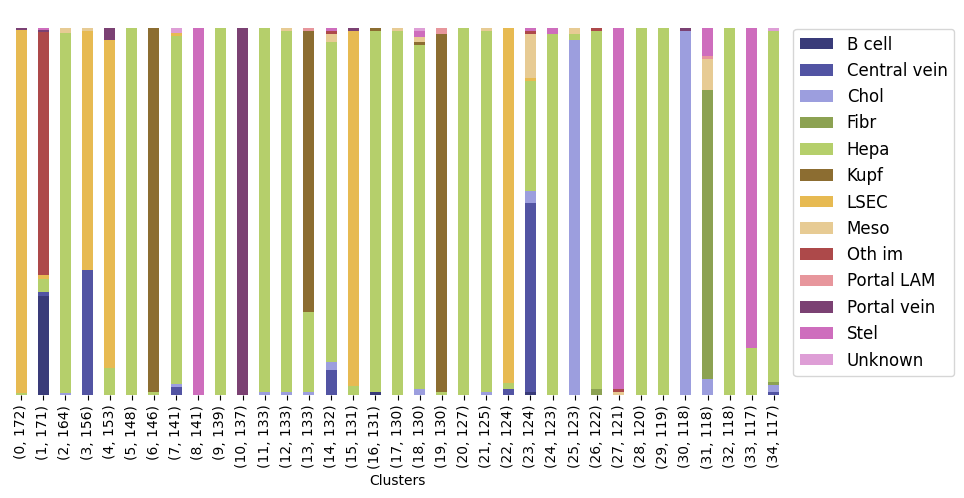

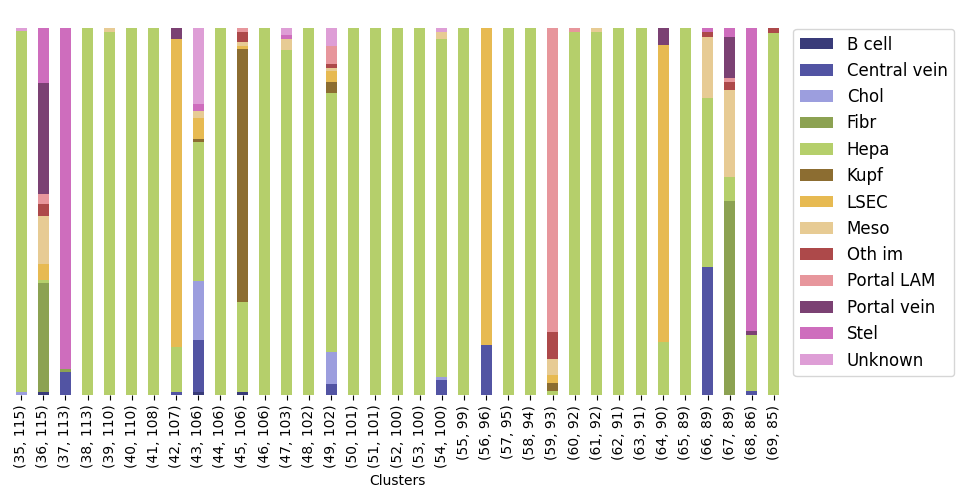

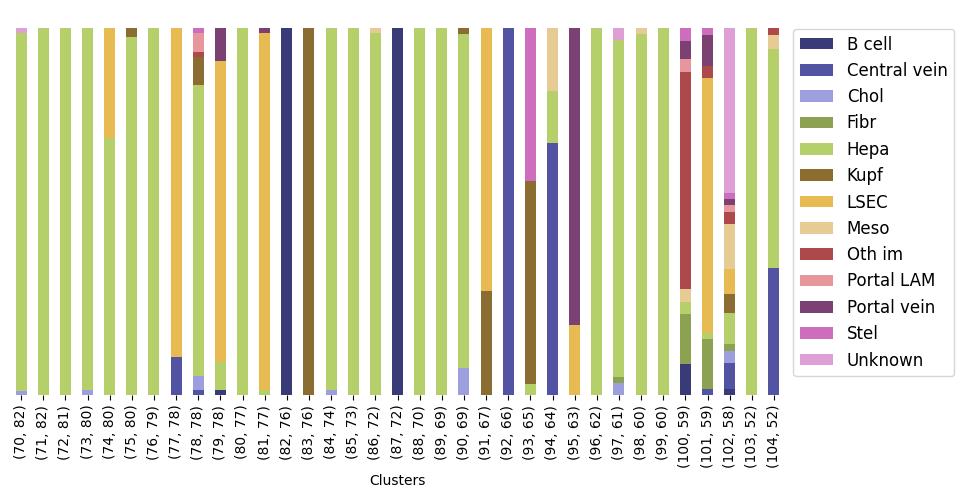

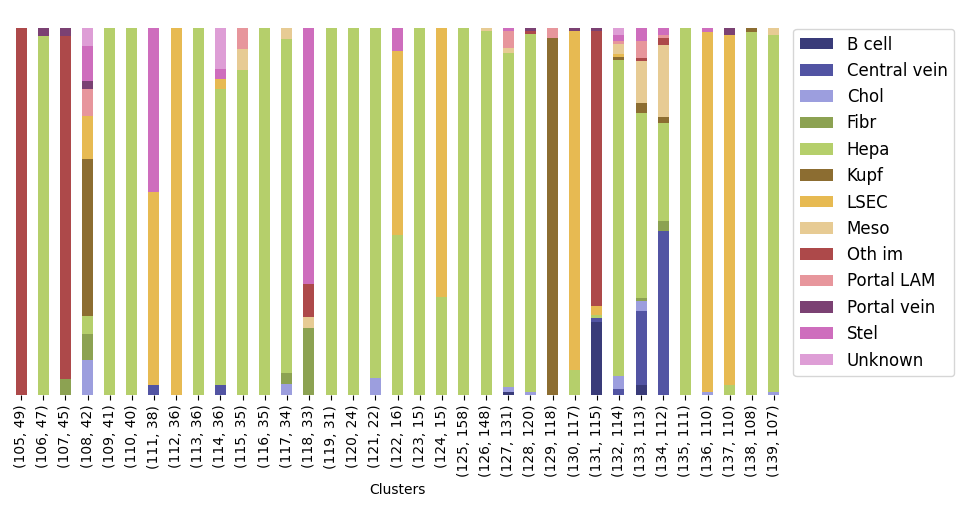

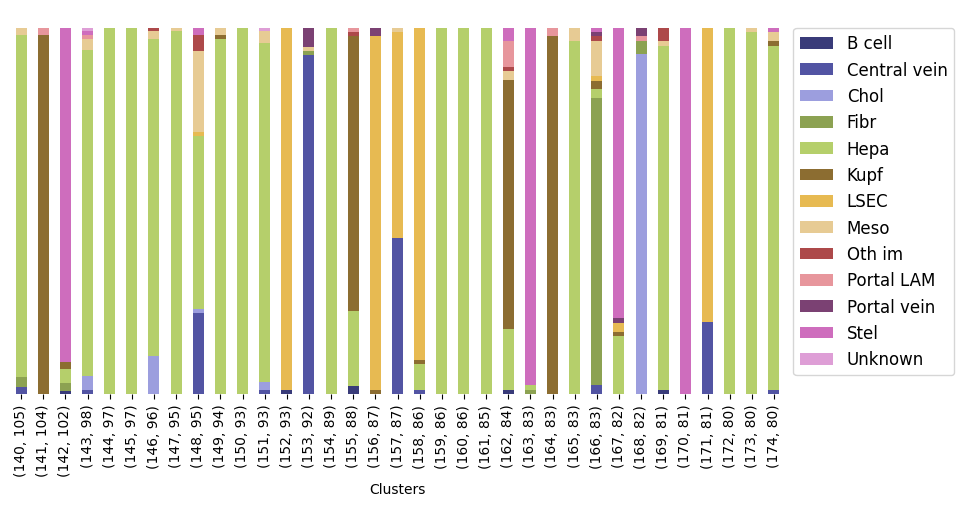

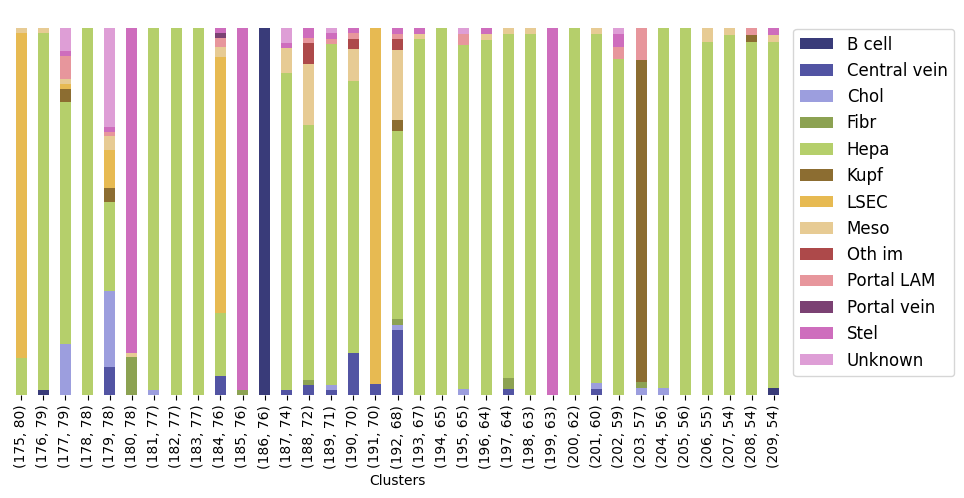

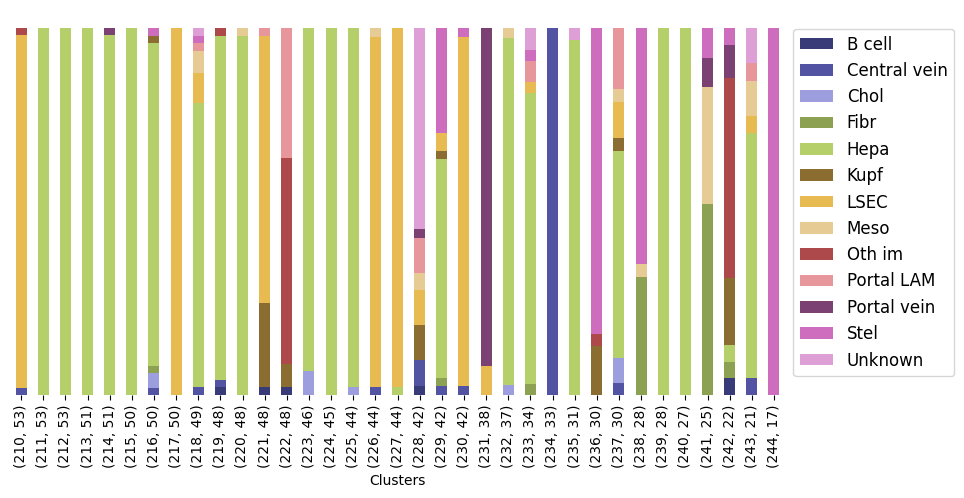

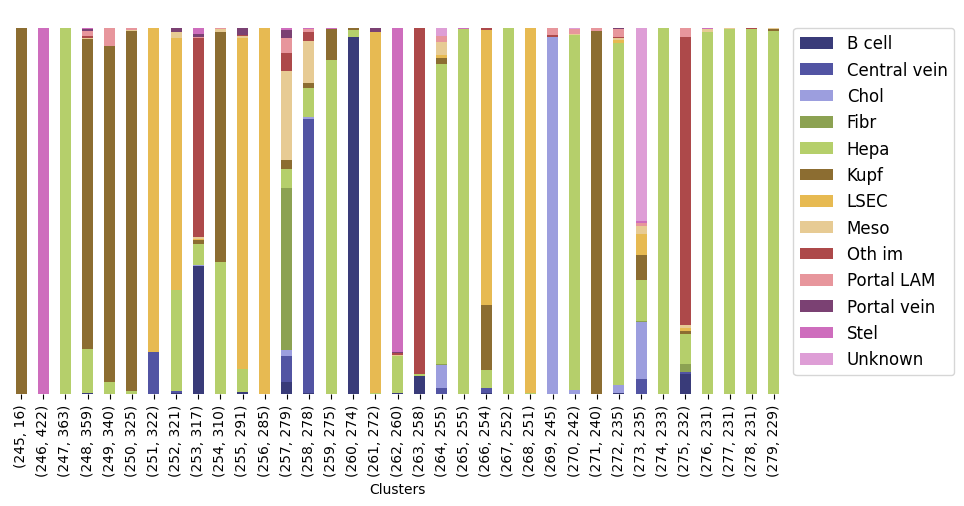

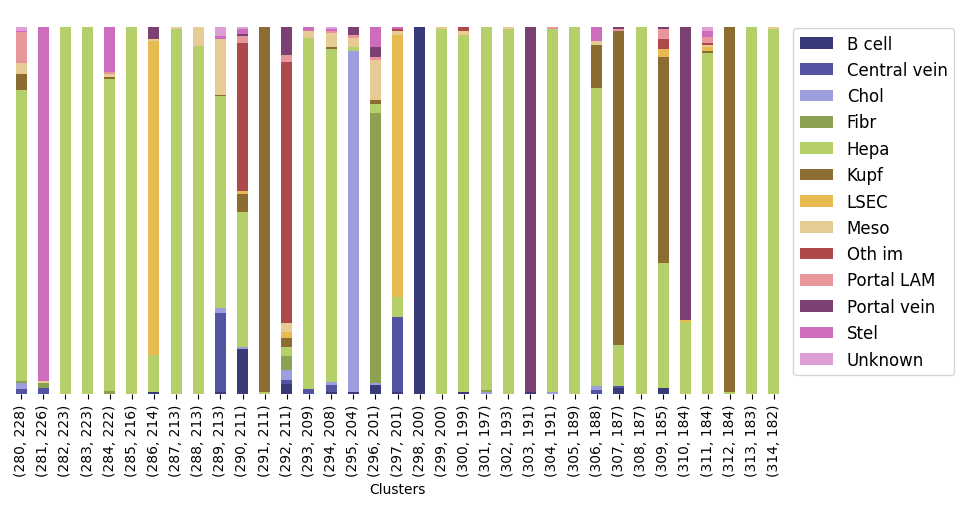

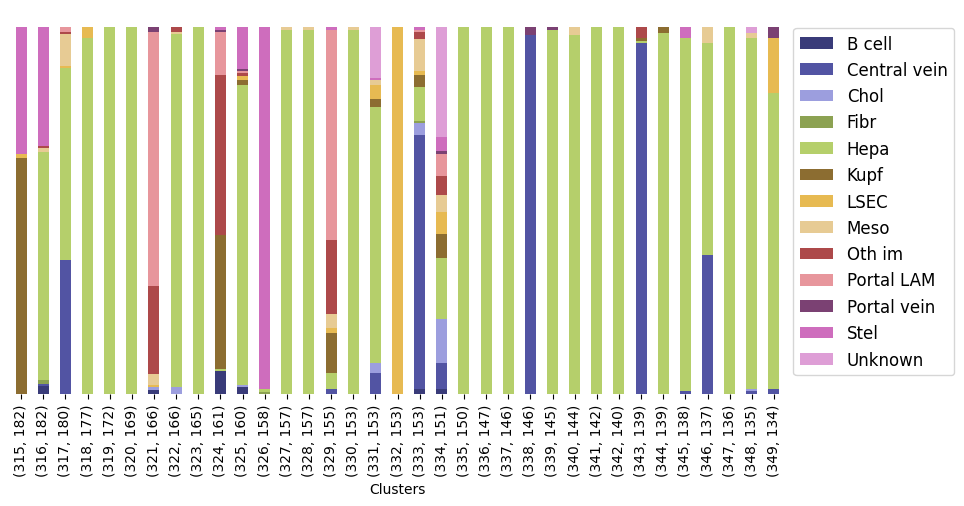

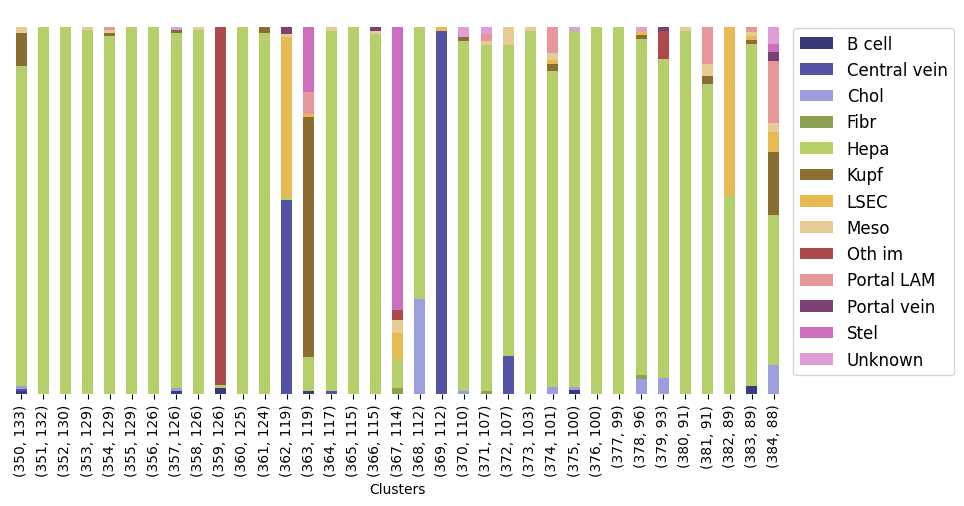

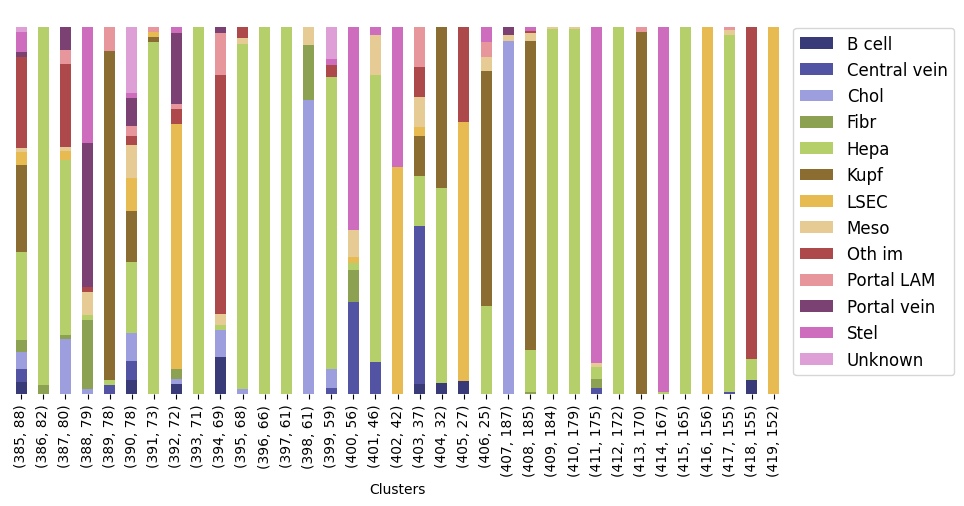

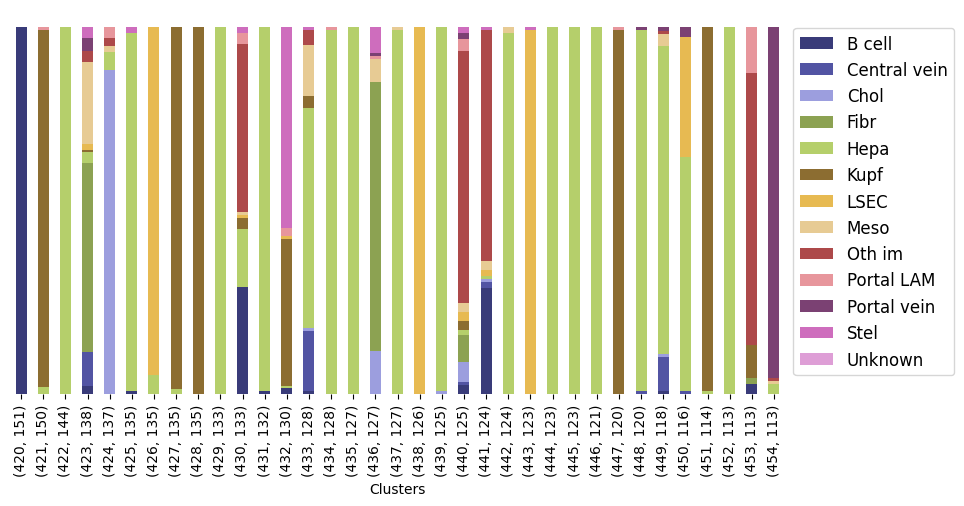

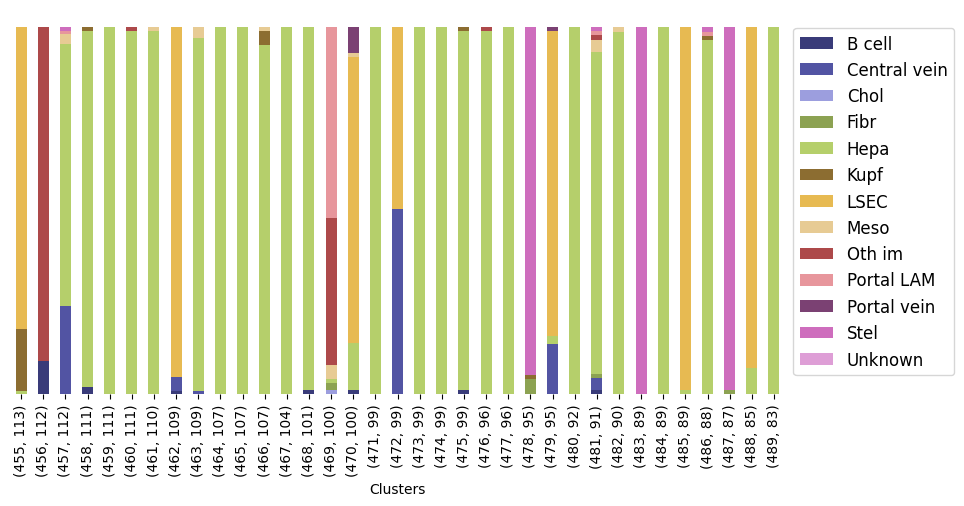

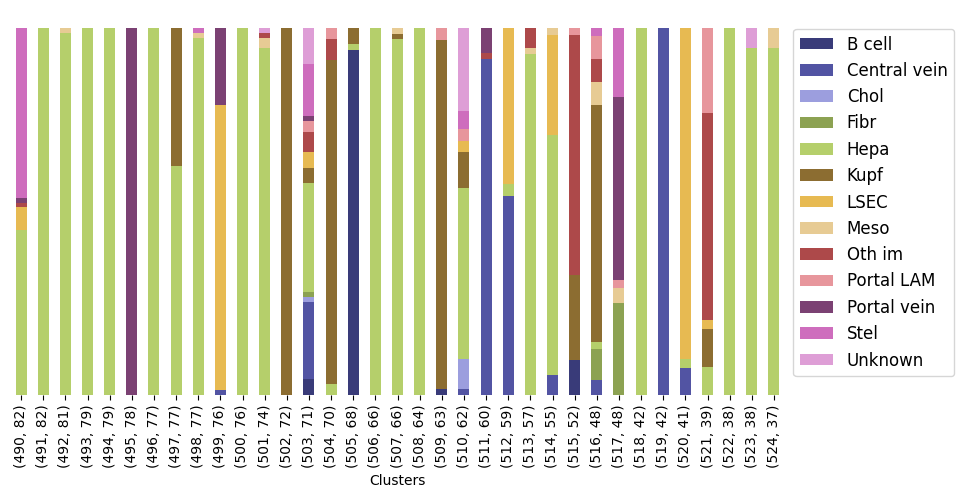

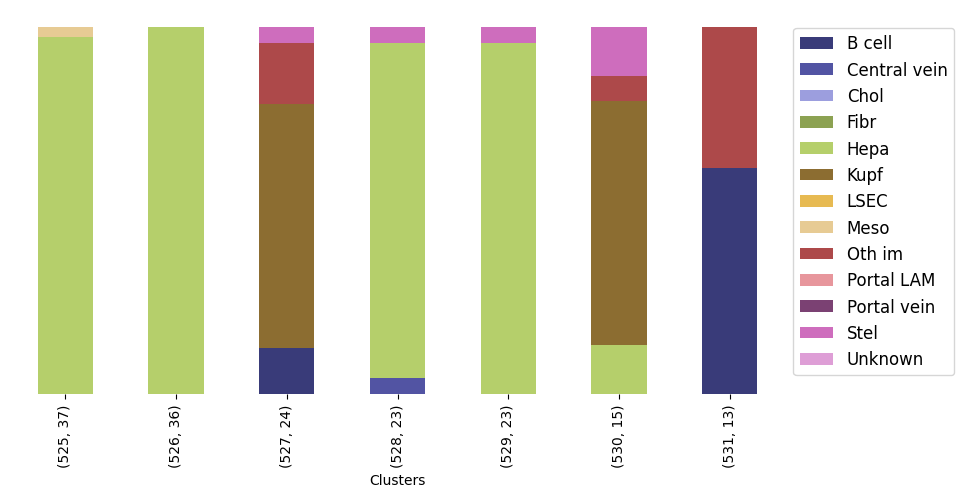

In [8]:
cell_types = anndata_samples_together.obs[annotation].unique().tolist()  
leiden_clusters_per_ct = clusteringVSleiden(anndata_samples_together,annotation,"leiden",cell_types=cell_types,print_results=True)

333 cells randomly sampled from each cell type in every iteration to do the DEG analysis
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Hgf', 'LSEC'], ['Cxcl12', 'Stel'], ['Fn1', 'Stel'], ['Hgf', 'Stel'], ['Reln', 'Stel'], ['Plpp1', 'Portal vein'], ['Fn1', 'Chol']]
Stel
Maybe drop:[['Lpl', 'Fibr'], ['Plpp1', 'Fibr'], ['Axl', 'Fibr'], ['Lpl', 'Portal LAM'], ['Plpp1', 'Central vein'], ['Plpp1', 'Portal vein']]
Kupf
Maybe drop:[['Plpp1', 'Fibr'], ['Pecam1', 'B cell'], ['Plpp1', 'Central vein'], ['Plpp1', 'Portal vein']]
Hepa
Maybe drop:[['Slc40a1', 'LSEC'], ['Slc40a1', 'Stel']]
LSEC
Maybe drop:[['Sirpa', 'Portal LAM'], ['Sirpa', 'Kupf']]
Portal LAM
Maybe drop:[['Cd9', 'Portal vein'], ['Cd9', 'Chol'], ['Spp1', 'Chol']]
Central vein
Maybe drop:[['Flt4', 'Portal vein'], ['Cd9', 'Portal vein'], ['Cd9', 'Chol']]
Oth im
Maybe drop:[['Cd9', 'Portal vein'], ['Cd9', 'Chol']]
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Hgf', 'LSEC'], ['Cxcl12', 'Stel'], ['Fn1', 'Stel'], ['Hgf', 'Stel'], ['Reln', 'St

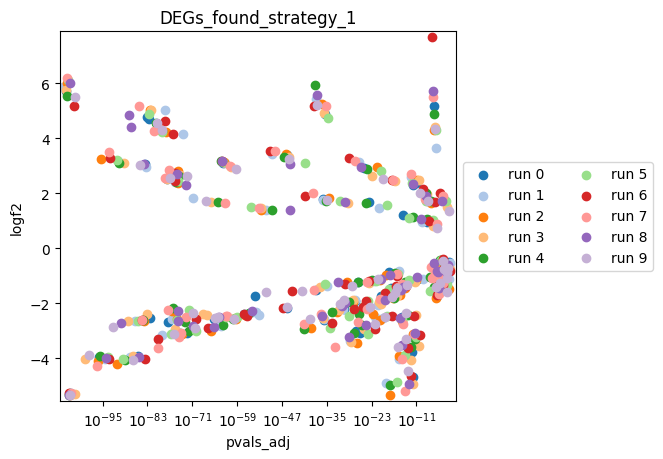

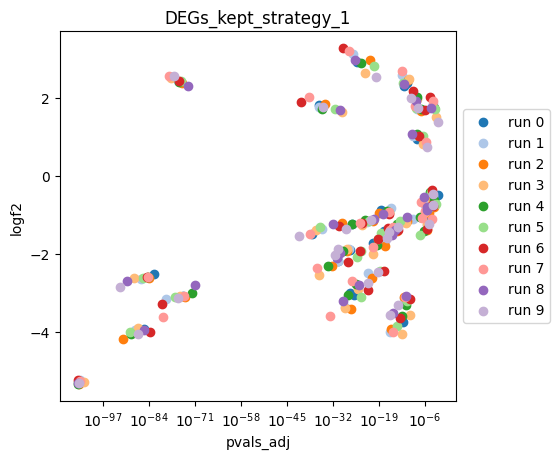

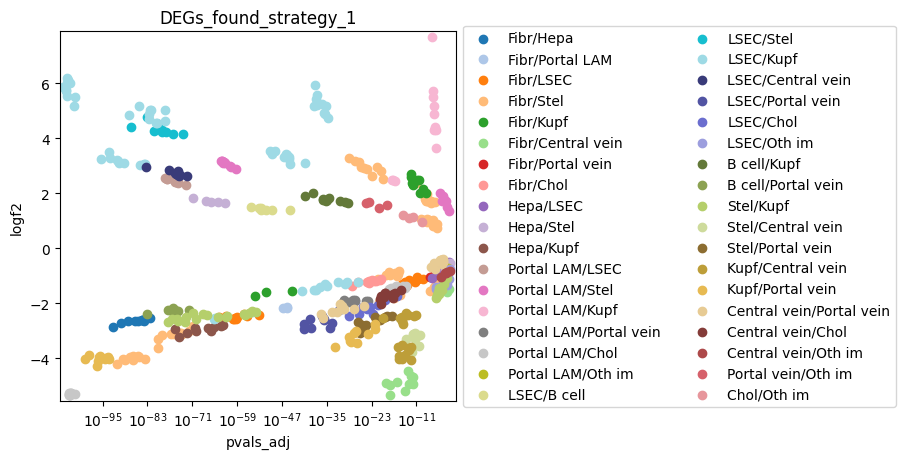

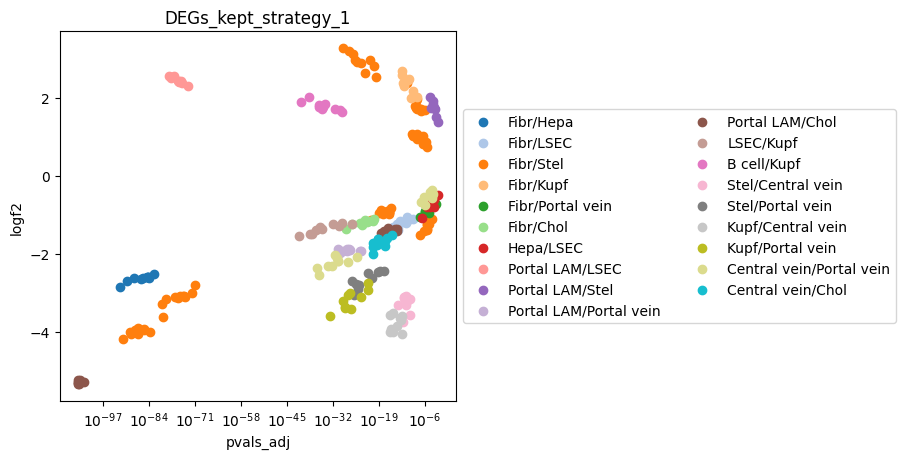

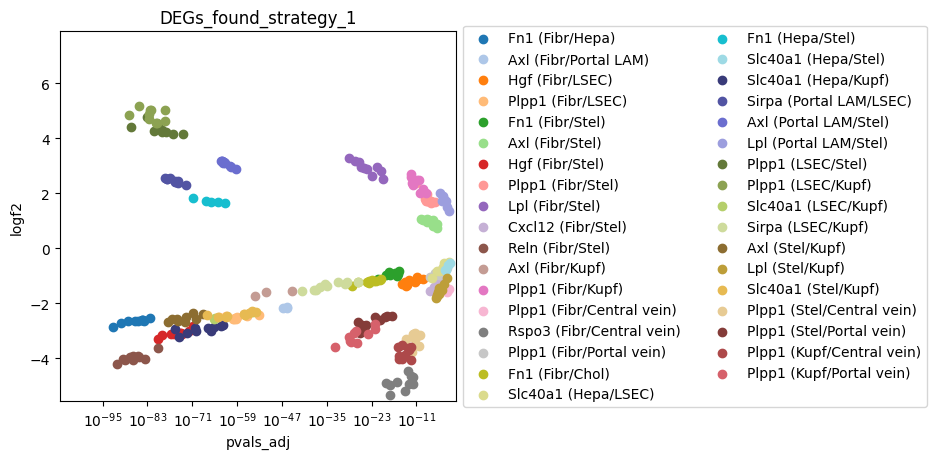

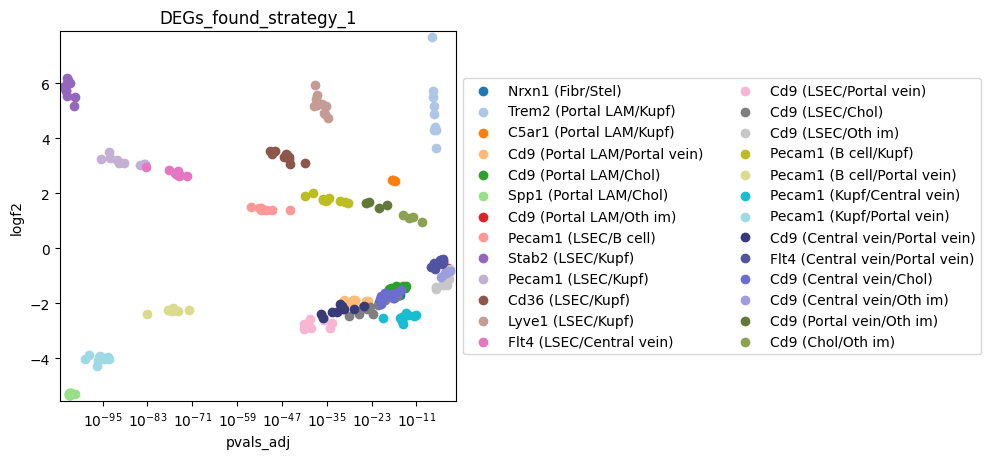

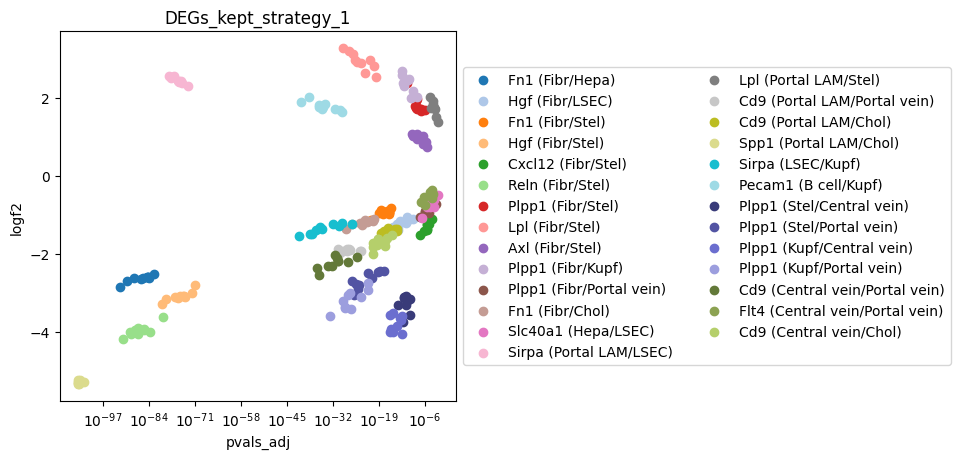

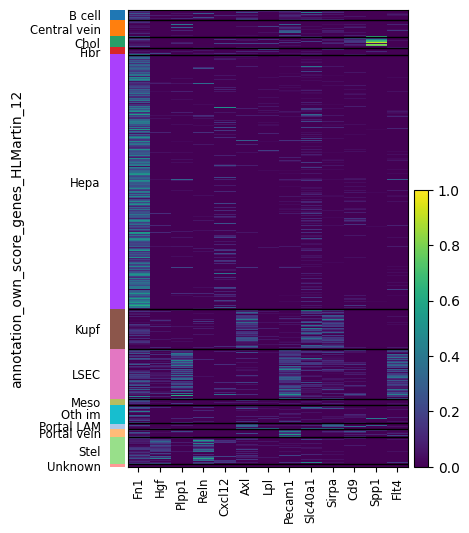

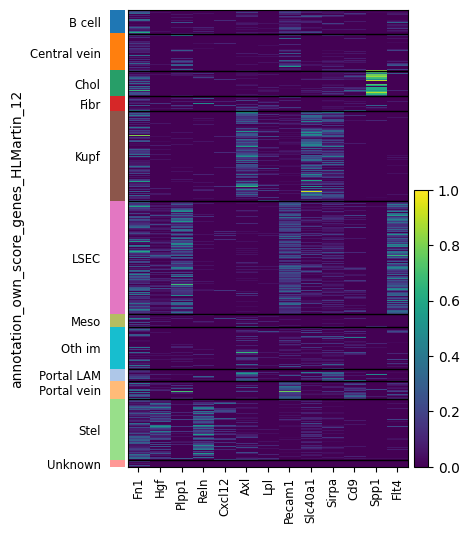

In [9]:
results_strat1_10, results_runs1_10, DEG_details_runs1_10 = Apply_strategy_multiple_times(anndata_samples_together,annotation,path_mg,10,1,OUTPUT_DIR)

333 cells randomly sampled from each cell type in every iteration to do the DEG analysis
['31', '2', '59', '0', '82', '8', '6', '23', '10', '25', '1']
Acta2
Is marker gene of: []
Could also be a marker gene of: ['Fibr', 'Portal vein']
Adamtsl2
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Chol']
Cd36
Is marker gene of: ['LSEC', 'Kupf']
Could also be a marker gene of: ['Portal vein']
Cd3e
Is marker gene of: []
Could also be a marker gene of: ['Oth im']
Cd5l
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['B cell']
Chil3
Is marker gene of: []
Could also be a marker gene of: ['Fibr']
Clec10a
Is marker gene of: []
Could also be a marker gene of: ['Portal LAM']
Clec4f
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['B cell']
Clec9a
Is marker gene of: []
Could also be a marker gene of: ['Portal LAM', 'LSEC', 'Kupf', 'Oth im']
Col1a1
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Portal LAM', 'Chol']
Cyp2e1
Is marker gene of: []
Could a

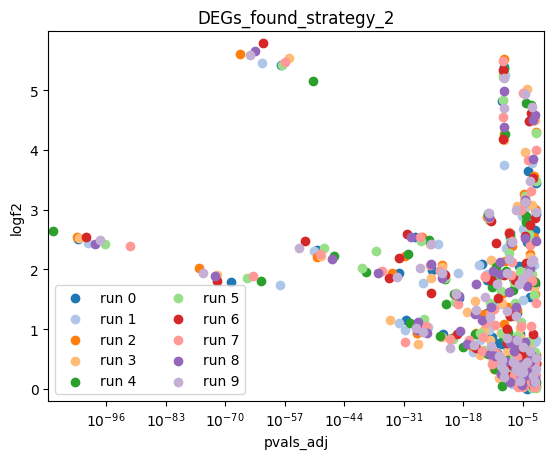

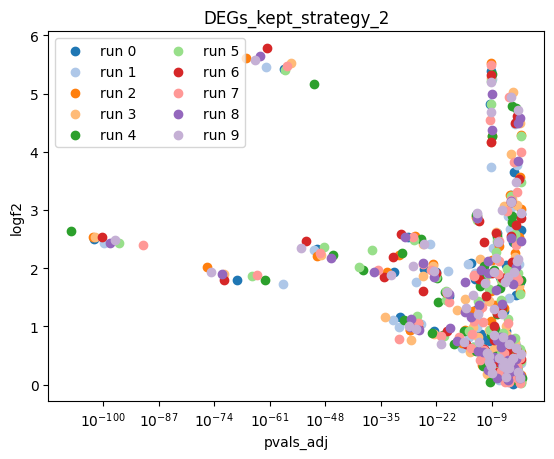

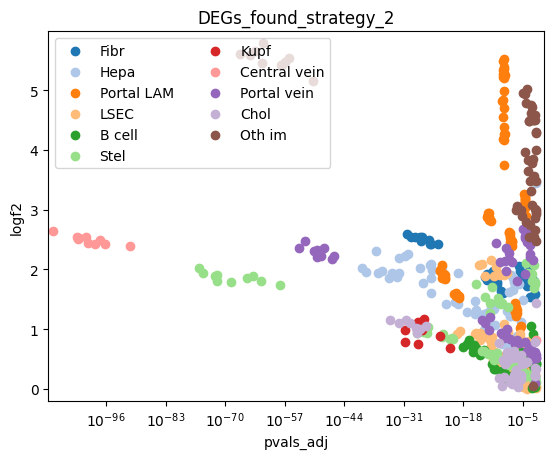

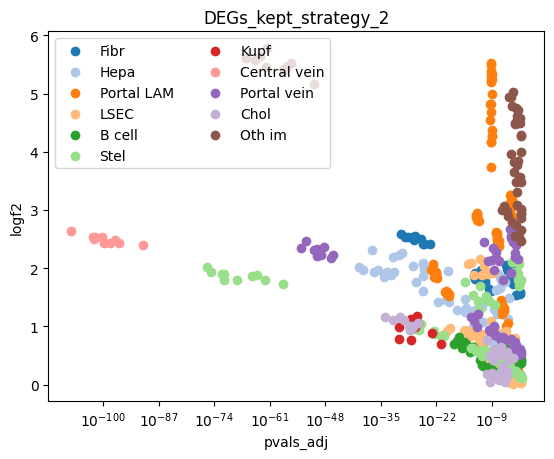

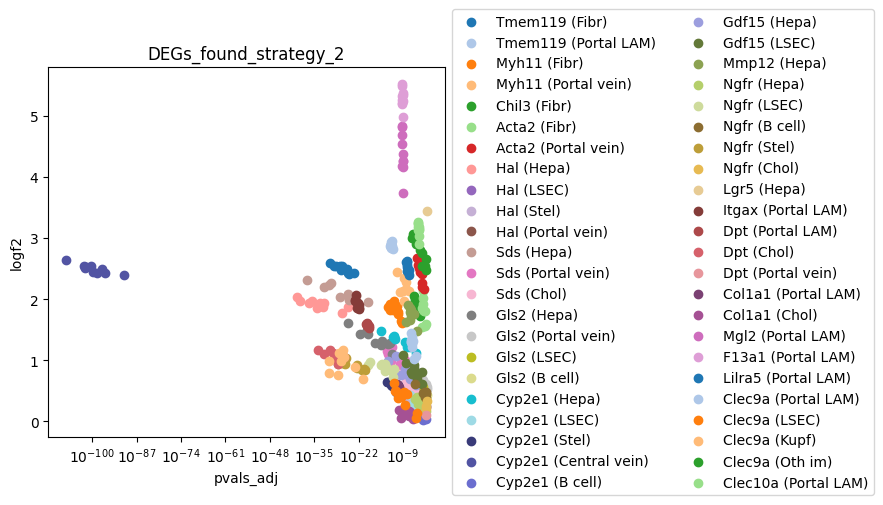

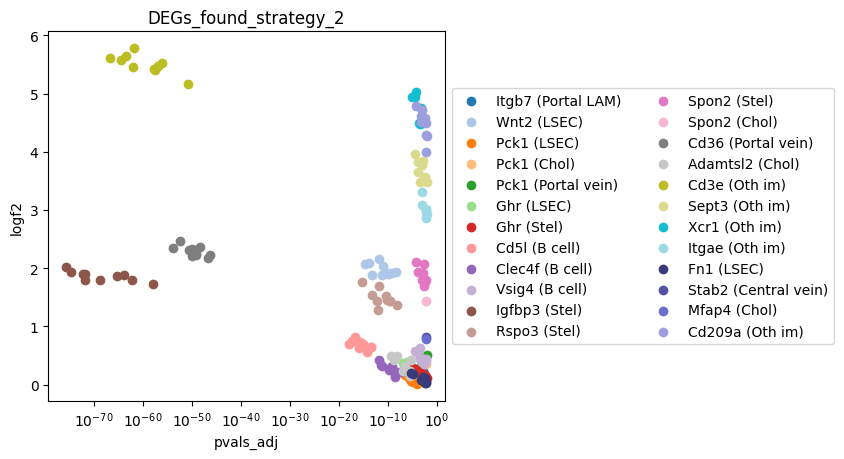

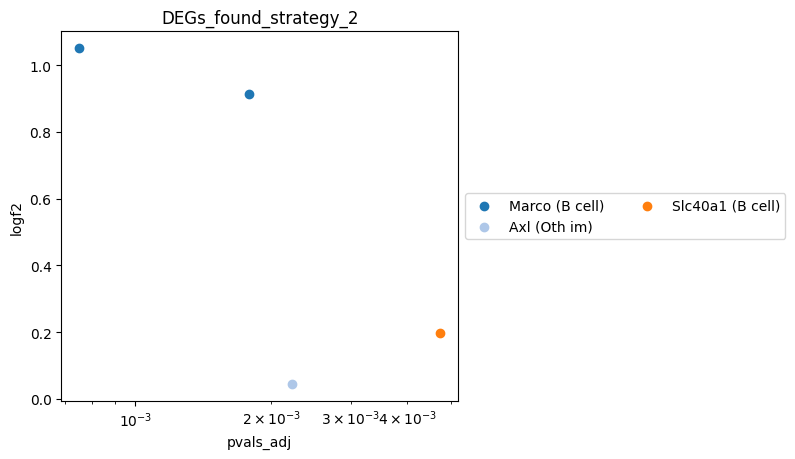

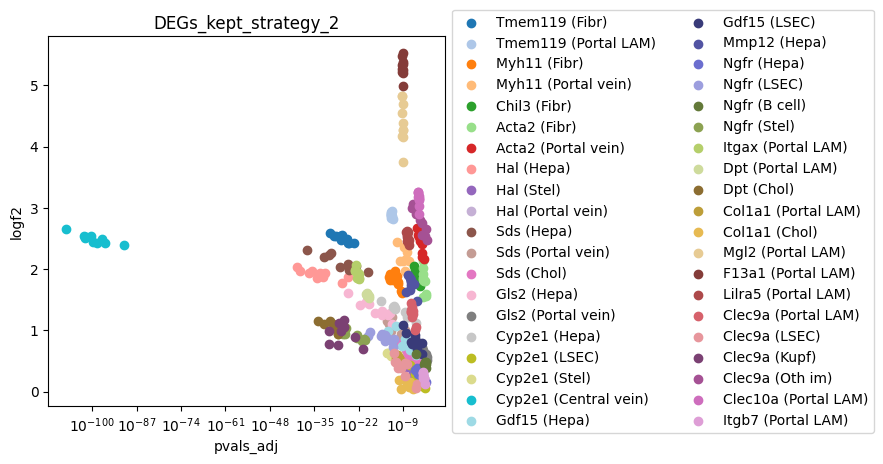

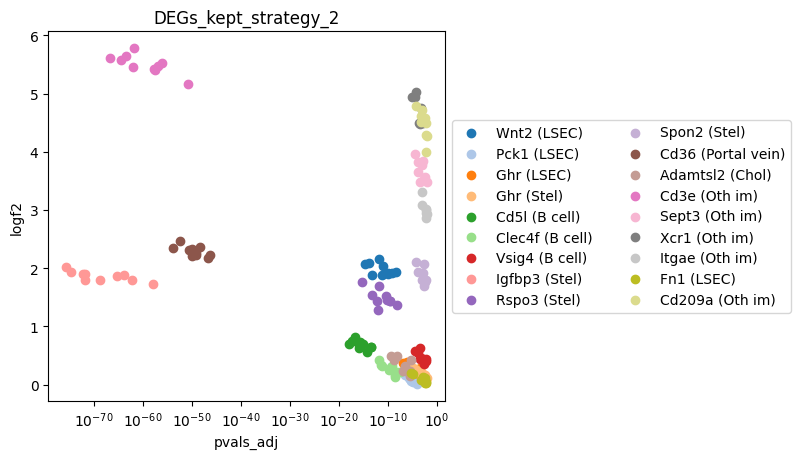

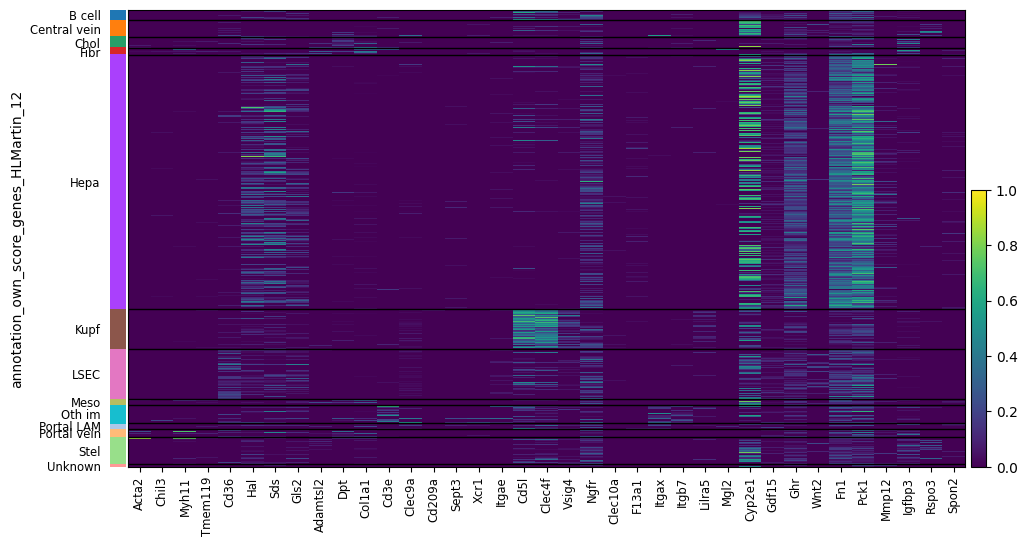

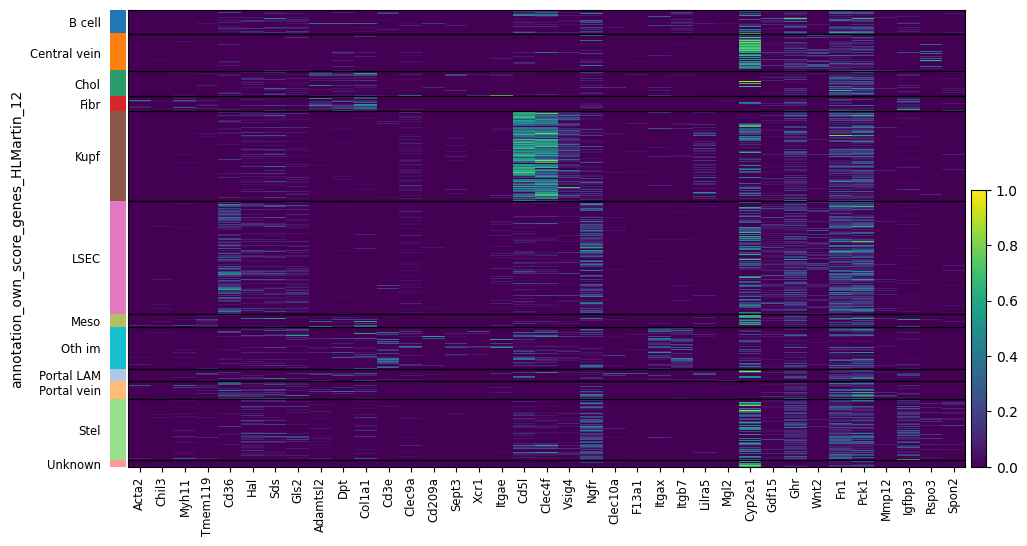

In [10]:
results_strat2_10, results_runs2_10, DEG_details_runs2_10 = Apply_strategy_multiple_times(anndata_samples_together,annotation,path_mg,10,2,OUTPUT_DIR)

1.0
Clec9a
Gls2
Itgae
Sept3
Xcr1
Sds
Siglech
Lgr5
Cox6a2
F13a1
Atp6v0d2
Myh11
Ngfr
Clec10a
Chil3
Mmp12
Mgl2
Acta2
Cyp2e1
Clic5
Cd3e
Cd209a
Mmrn1
Hal
Hepa            11.00
LSEC            15.00
Portal vein     11.75
Central vein     8.00
Chol            11.50
Kupf            19.50
Stel            16.75
Fibr            19.50
B cell           8.50
Meso             6.00
Portal LAM      21.50
Oth im          12.00
dtype: float64


Hepa            11.00
LSEC            15.00
Portal vein     11.75
Central vein     8.00
Chol            11.50
Kupf            19.50
Stel            16.75
Fibr            19.50
B cell           8.50
Meso             6.00
Portal LAM      21.50
Oth im          12.00
dtype: float64

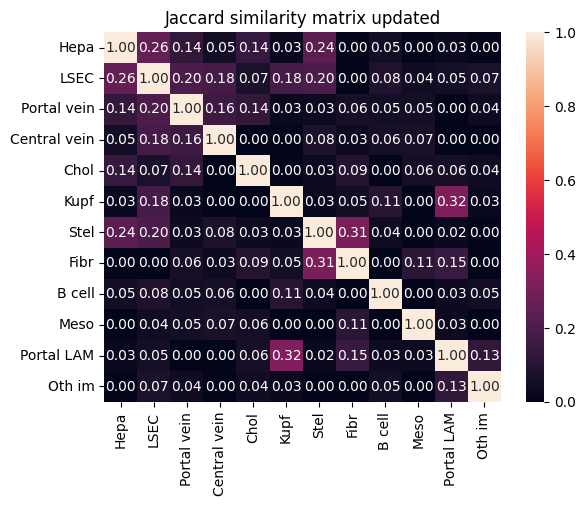

In [11]:
# CHANGE MARKER GENE LIST BASED ON STRATEGY 1 AND STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
# get all genes in df_mg
genes = df_mg.index.tolist()
all_positive_weights = []
for column in df_mg.columns:
    # get all positive weights in column
    positive_weights = df_mg[column][df_mg[column] > 0].tolist()
    all_positive_weights.extend(positive_weights)
median_positive_weight = np.median(all_positive_weights)
print(median_positive_weight)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
all_positive_weights_per_gene = {}
for gene in genes:
    positive_weights = df_mg.loc[gene][df_mg.loc[gene] > 0].tolist()
    if len(positive_weights) > 0:
        all_positive_weights_per_gene[gene] = positive_weights
    else:
        all_positive_weights_per_gene[gene] = [median_positive_weight]
        print(gene)
keys = results_strat2_10.keys()
for key in keys:
    for g in results_strat2_10[key]:
        if g in genes:
            df_mg.loc[g,key] = np.median(all_positive_weights_per_gene[g])
        else:
            df_mg.loc[len(df_mg)] = 0
            df_mg.rename(index={len(df_mg)-1:g},inplace=True)
            df_mg.loc[g,key] = median_positive_weight
            genes.append(g)
            all_positive_weights_per_gene[g] = [median_positive_weight]
path_mg_strat = path_mg[:-4] + '_updated.csv'
df_mg.to_csv(path_mg_strat)
Jaccard_similarity_matrix(path_mg_strat,'updated')